In [6]:
import numpy as np
import pandas as pd
import json
import os
from tabulate import tabulate

import matplotlib.pyplot as plt

from susy_qm.vqe_plotter import BoxPlotter

import git
repo = git.Repo('.', search_parent_directories=True)
repo_path = repo.working_tree_dir


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

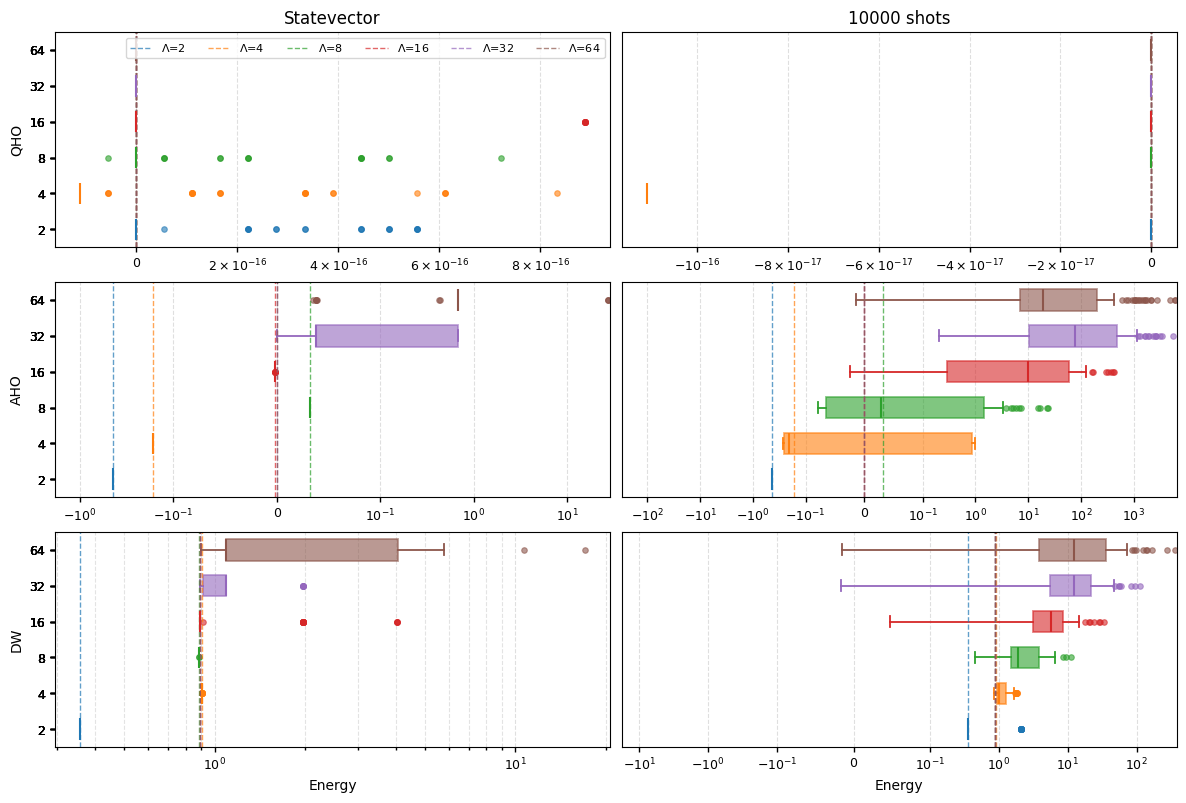

In [9]:
cutoffs = [2,4,8,16,32,64]
potentials = ["QHO","AHO","DW"]
shots_list = [None,10000]

data_path = r"SUSY\SUSY QM\PennyLane\COBYQA\PauliDecomp\VQE\CQAVQE-Exact"

plotter = BoxPlotter(data_path, potentials, cutoffs, shots_list)
plotter.plot_energy_boxplot(showfliers=True, show_legend=True)
plt.show()



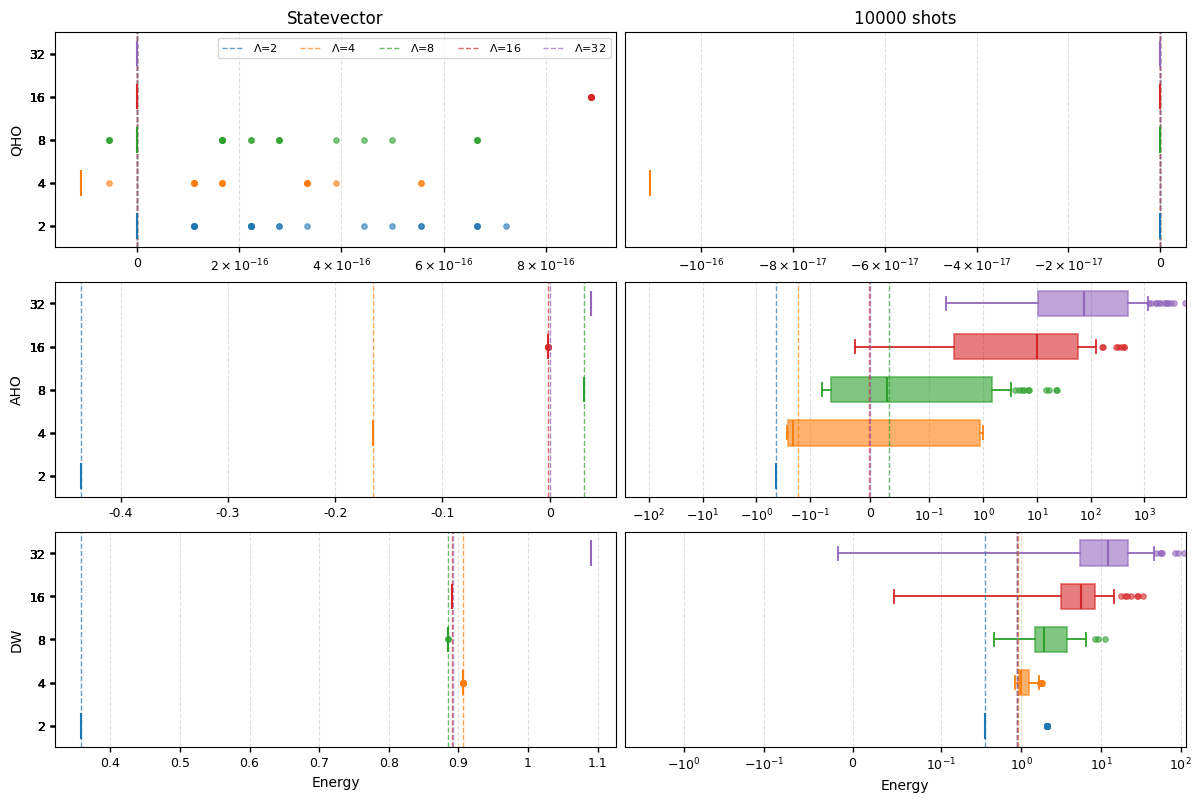

In [5]:
cutoffs = [2,4,8,16,32]
potentials = ["QHO","AHO","DW"]
shots_list = [None,10000]

data_path = r"SUSY\SUSY QM\PennyLane\COBYQA\PauliDecomp\VQE\CQAVQE-Exact"

plotter = BoxPlotter(data_path, potentials, cutoffs, shots_list)
plotter.plot_energy_boxplot(showfliers=True, show_legend=True)
plt.show()



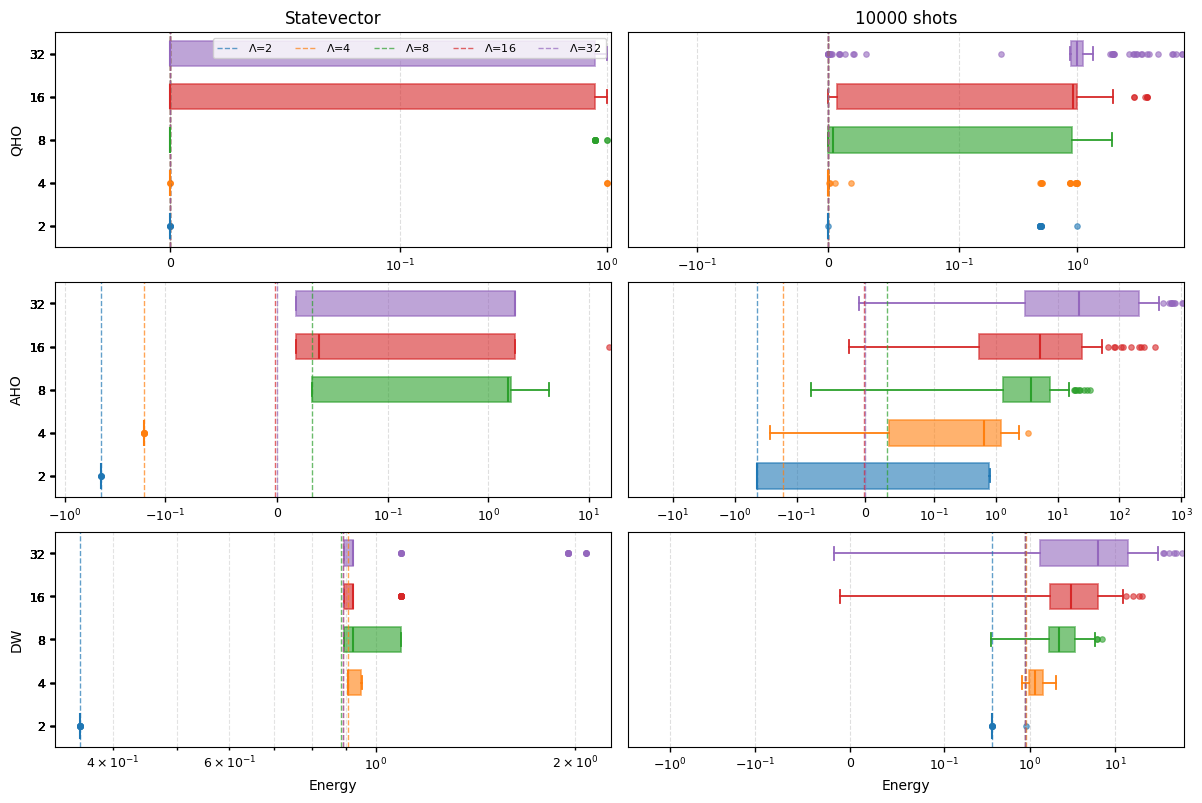

In [3]:
cutoffs = [2,4,8,16,32]
potentials = ["QHO","AHO","DW"]
shots_list = [None,10000]

data_path = r"SUSY\SUSY QM\PennyLane\COBYQA\PauliDecomp\VQE\FilesNP-RA"

plotter = BoxPlotter(data_path, potentials, cutoffs, shots_list)
plotter.plot_energy_boxplot(showfliers=True, show_legend=True)
plt.show()



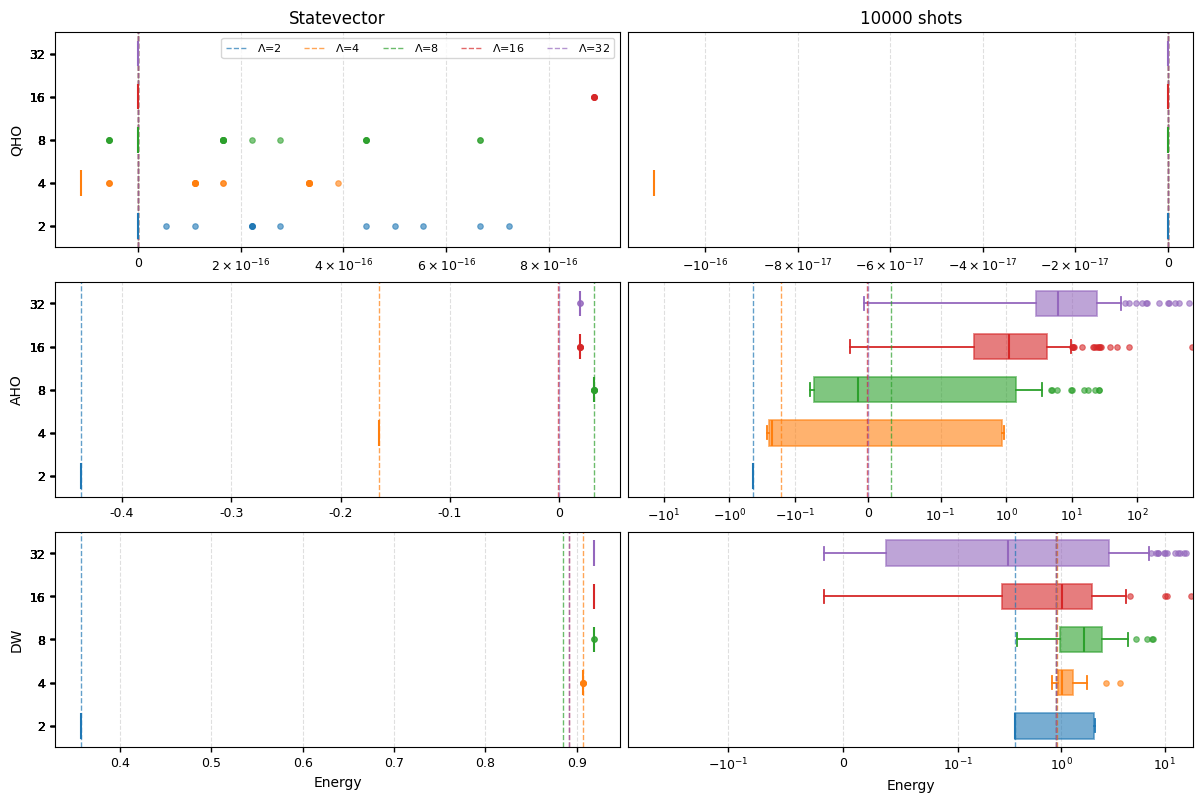

In [4]:
cutoffs = [2,4,8,16,32]
potentials = ["QHO","AHO","DW"]
shots_list = [None,10000]

data_path = r"SUSY\SUSY QM\PennyLane\COBYQA\PauliDecomp\VQE\TruncatedAnsatz\CQAVQE-Reduced4"

plotter = BoxPlotter(data_path, potentials, cutoffs, shots_list)
plotter.plot_energy_boxplot(showfliers=True, show_legend=True)
plt.show()

